In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Wine\Wine_NE_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,NaN,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,NaN,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,NaN,2.26,20.0,NaN,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	7
float64		column 2	7
float64		column 3	0
float64		column 4	0
float64		column 5	7
float64		column 6	7
float64		column 7	0
float64		column 8	0
float64		column 9	15
float64		column 10	29
float64		column 11	8
float64		column 12	7
float64		column 13	21


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
count,171.000000,171.000000,178.000000,178.000000,171.000000,171.000000,178.000000,178.000000,163.000000,149.000000,170.000000,171.000000,157.000000
mean,13.010936,2.304327,2.366517,19.494944,100.245614,2.286316,2.029270,0.361854,1.571288,5.045302,0.955506,2.623801,742.222930
std,0.812783,1.090518,0.274344,3.339564,14.081211,0.617521,0.998859,0.124453,0.568928,2.240846,0.226258,0.715446,310.579681
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.370000,1.595000,2.210000,17.200000,89.000000,1.745000,1.205000,0.270000,1.230000,3.300000,0.782500,1.925000,510.000000
50%,13.050000,1.860000,2.360000,19.500000,98.000000,2.320000,2.135000,0.340000,1.540000,4.800000,0.965000,2.810000,675.000000
75%,13.675000,3.010000,2.557500,21.500000,107.500000,2.800000,2.875000,0.437500,1.885000,6.130000,1.117500,3.175000,937.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


<AxesSubplot:>

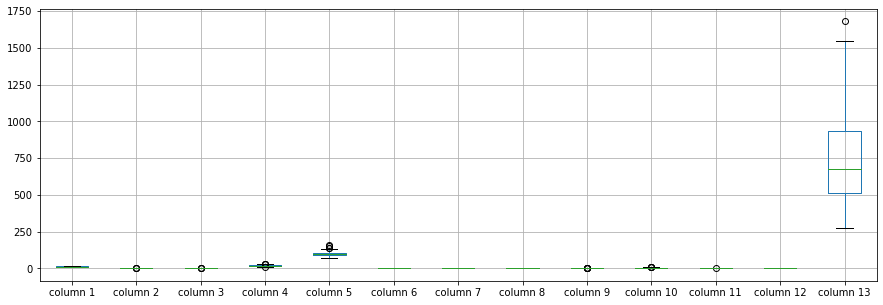

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      13.010936
column 2       2.304327
column 3       2.366517
column 4      19.494944
column 5     100.245614
column 6       2.286316
column 7       2.029270
column 8       0.361854
column 9       1.571288
column 10      5.045302
column 11      0.955506
column 12      2.623801
column 13    742.222930
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
column 1,1.000000,0.100293,0.209591,-0.313978,0.264990,0.323593,0.228640,-0.143386,0.117843,0.501473,-0.084721,0.071209,0.661838
column 2,0.100293,1.000000,0.176071,0.299141,-0.048715,-0.322483,-0.389133,0.281565,-0.201040,0.193486,-0.551193,-0.327904,-0.163888
column 3,0.209591,0.176071,1.000000,0.443367,0.305976,0.137809,0.115077,0.186230,0.050372,0.255379,-0.094464,0.006619,0.216095
column 4,-0.313978,0.299141,0.443367,1.000000,-0.050352,-0.310253,-0.351370,0.361922,-0.166814,0.012104,-0.269752,-0.270543,-0.436487
column 5,0.264990,-0.048715,0.305976,-0.050352,1.000000,0.214776,0.221113,-0.273002,0.240748,0.193112,0.076084,0.087945,0.369667
column 6,0.323593,-0.322483,0.137809,-0.310253,0.214776,1.000000,0.859192,-0.451393,0.597395,-0.026535,0.455096,0.694104,0.481192
column 7,0.228640,-0.389133,0.115077,-0.351370,0.221113,0.859192,1.000000,-0.537900,0.651198,-0.148785,0.575601,0.788414,0.463248
column 8,-0.143386,0.281565,0.186230,0.361922,-0.273002,-0.451393,-0.537900,1.000000,-0.350711,0.118313,-0.310682,-0.494372,-0.310474
column 9,0.117843,-0.201040,0.050372,-0.166814,0.240748,0.597395,0.651198,-0.350711,1.000000,0.046939,0.311489,0.486742,0.349034
column 10,0.501473,0.193486,0.255379,0.012104,0.193112,-0.026535,-0.148785,0.118313,0.046939,1.000000,-0.467235,-0.391449,0.371048


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [13,13+90,13+90+90,13+90+90,13+90+90+90+90,13+90+90+90+90+90,13+90+90+90+90+90+90,13+90+90+90+90+90,13+90+90+90+90,13+90+90+90,13+90+90,13+90,13], vae_layer = False, seed = 900)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [13]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 853.3680087002841
Epoch: 1 , loss: 856.899735884233
Epoch: 2 , loss: 855.0334139737216
Epoch: 3 , loss: 855.4776944247159
Epoch: 4 , loss: 857.0370982776989
Epoch: 5 , loss: 854.5060702237216
Epoch: 6 , loss: 850.3053366921165
Epoch: 7 , loss: 849.9168479225852
Epoch: 8 , loss: 857.7116144353694
Epoch: 9 , loss: 850.0098155628551
Epoch: 10 , loss: 851.0112360174006
Epoch: 11 , loss: 857.7232111150569
Epoch: 12 , loss: 846.4651711203835
Epoch: 13 , loss: 855.7640991210938
Epoch: 14 , loss: 848.3888827237216
Epoch: 15 , loss: 858.7731600674716
Epoch: 16 , loss: 855.2843405983665
Epoch: 17 , loss: 837.7959317294034
Epoch: 18 , loss: 838.2451449307529
Epoch: 19 , loss: 844.7741921164773
Epoch: 20 , loss: 840.238486550071
Epoch: 21 , loss: 842.6664539683949
Epoch: 22 , loss: 847.1776234019886
Epoch: 23 , loss: 836.6286954012784
Epoch: 24 , loss: 846.7840687144886
Epoch: 25 , loss: 838.6553899591619
Epoch: 2

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(178, 13)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      12.93
column 2       3.80
column 3       2.65
column 4      18.60
column 5     102.00
column 6       2.41
column 7       2.41
column 8       0.25
column 9       1.98
column 10      4.50
column 11      1.03
column 12      3.52
column 13    770.00
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Wine.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,-1.128936,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.0,-1.305365,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
174,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
175,0.0,-4.115206,0.0,0.0,-119.813424,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
176,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(3477.2143625174035, 10898.078031484092)

In [17]:
NRMS=numerator/denominator
NRMS


0.3190667521806943

In [18]:
new_df.iloc[66,:]

column 1      13.11
column 2       1.01
column 3       1.70
column 4      15.00
column 5      78.00
column 6       2.98
column 7       3.18
column 8       0.26
column 9       2.28
column 10      5.30
column 11      1.12
column 12      3.18
column 13    502.00
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,14.23,1.710000,2.43,15.6,127.000000,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065.0
1,13.20,0.651064,2.14,11.2,100.000000,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050.0
2,13.16,2.360000,2.67,18.6,101.000000,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185.0
3,14.37,1.950000,2.50,16.8,113.000000,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480.0
4,13.24,2.590000,2.87,21.0,118.000000,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,4.344635,2.45,20.5,95.000000,1.68,0.61,0.52,1.06,7.700000,0.64,1.74,740.0
174,13.40,3.910000,2.48,23.0,102.000000,1.80,0.75,0.43,1.41,7.300000,0.70,1.56,750.0
175,13.27,0.164794,2.26,20.0,0.186576,1.59,0.69,0.43,1.35,10.200000,0.59,1.56,835.0
176,13.17,2.590000,2.37,20.0,120.000000,1.65,0.68,0.53,1.46,9.300000,0.60,1.62,840.0


In [20]:
imputations[-1].to_excel("Wine_NE_5(imp).xlsx", index=False, header=False)